In [6]:
!pip install gekko
# !pip install sympy

     |████████████████████████████████| 10.8MB 4.2MB/s 


In [7]:
### Based on Figure 6 in Bretl 2014 theory paper. Code to check that a single 
# configuration of an elastic rod, represented in coordinates by a point a is both 
# stable and collision free

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt  

In [8]:
### Generate representation a
# a in A in R6 where (a2,a3,a5,a6) =/= (0,0,0,0)
#numpy array with random values
a = np.random.rand(6)

print(a)

[0.54717061 0.30945083 0.50054754 0.62272953 0.2929413  0.26510317]


In [26]:
## Solve for mu's
m = GEKKO()            # create GEKKO model

# define parameters
c1 = 1.0
c2 = 1.0
c3 = 1.0
t_steps = 100
m.time = np.linspace(0,1,t_steps) # t range [0,1]
t = m.Param(value=m.time)

# define variables
# initial conditions mu(0) = a
mu1 = m.Var(value=a[0])           
mu2 = m.Var(value=a[1])  
mu3 = m.Var(value=a[2])           
mu4 = m.Var(value=a[3])  
mu5 = m.Var(value=a[4])           
mu6 = m.Var(value=a[5])     

# define equations
m.Equation(mu1.dt() == (c3**-1)*mu3*mu2 - (c2**-1)*mu2*mu3)
m.Equation(mu2.dt() == mu6 + (c1**-1)*mu1*mu3 - (c3**-1)*mu3*mu1)
m.Equation(mu3.dt() == -mu5 + (c2**-1)*mu2*mu1 - (c1**-1)*mu1*mu2)
m.Equation(mu4.dt() == (c3**-1)*mu3*mu5 - (c2**-1)*mu2*mu6)
m.Equation(mu5.dt() == (c1**-1)*mu1*mu6 - (c3**-1)*mu3*mu4)
m.Equation(mu6.dt() == (c2**-1)*mu2*mu4 - (c1**-1)*mu1*mu5)

# solve equations
m.options.IMODE=4
m.solve(disp=False)

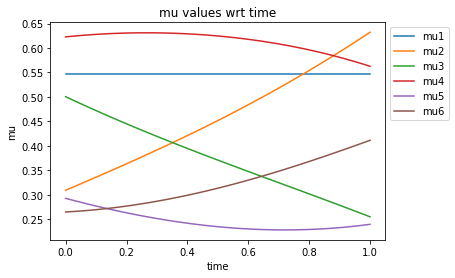

In [27]:
### Plot mu's
plt.plot(m.time,mu1.value,label='mu1')
plt.plot(m.time,mu2.value,label='mu2')
plt.plot(m.time,mu3.value,label='mu3')
plt.plot(m.time,mu4.value,label='mu4')
plt.plot(m.time,mu5.value,label='mu5')
plt.plot(m.time,mu6.value,label='mu6')
plt.xlabel('time')
plt.ylabel('mu')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('mu values wrt time')
plt.show()

In [ ]:
### Solve for stability (Jacobian)

In [28]:
### Solve for q's

# define variables
# initial condition q(0) = I
q11 = m.Var(value = 1.0)
q12 = m.Var(value = 0.0)
q13 = m.Var(value = 0.0)
q14 = m.Var(value = 0.0)
q21 = m.Var(value = 0.0)
q22 = m.Var(value = 1.0)
q23 = m.Var(value = 0.0)
q24 = m.Var(value = 0.0)
q31 = m.Var(value = 0.0)
q32 = m.Var(value = 0.0)
q33 = m.Var(value = 1.0)
q34 = m.Var(value = 0.0)
q41 = m.Var(value = 0.0)
q42 = m.Var(value = 0.0)
q43 = m.Var(value = 0.0)
q44 = m.Var(value = 1.0)

# define equations
m.Equation(q11.dt() == q12*(mu3/c3) - q13*(mu2/c2))
m.Equation(q21.dt() == q22*(mu3/c3) - q23*(mu2/c2))
m.Equation(q31.dt() == q32*(mu3/c3) - q33*(mu2/c2))
m.Equation(q41.dt() == q42*(mu3/c3) - q43*(mu2/c2))
m.Equation(q12.dt() == -q12*(mu3/c3) + q14*(mu1/c1))
m.Equation(q22.dt() == -q22*(mu3/c3) + q24*(mu1/c1))
m.Equation(q32.dt() == -q32*(mu3/c3) + q34*(mu1/c1))
m.Equation(q42.dt() == -q42*(mu3/c3) + q44*(mu1/c1))
m.Equation(q13.dt() == q11*(mu2/c2) - q12*(mu1/c1))
m.Equation(q23.dt() == q21*(mu2/c2) - q22*(mu1/c1))
m.Equation(q33.dt() == q31*(mu2/c2) - q32*(mu1/c1))
m.Equation(q43.dt() == q41*(mu2/c2) - q42*(mu1/c1))
m.Equation(q14.dt() == q11)
m.Equation(q24.dt() == q21)
m.Equation(q34.dt() == q31)
m.Equation(q44.dt() == q41)

# solve equations
m.options.IMODE=4
m.solve(disp=False)

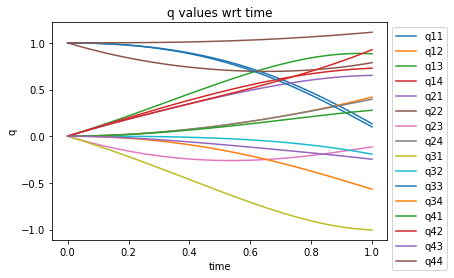

In [29]:
### Plot q's
plt.plot(m.time,q11.value,label='q11')
plt.plot(m.time,q12.value,label='q12')
plt.plot(m.time,q13.value,label='q13')
plt.plot(m.time,q14.value,label='q14')
plt.plot(m.time,q21.value,label='q21')
plt.plot(m.time,q22.value,label='q22')
plt.plot(m.time,q23.value,label='q23')
plt.plot(m.time,q24.value,label='q24')
plt.plot(m.time,q31.value,label='q31')
plt.plot(m.time,q32.value,label='q32')
plt.plot(m.time,q33.value,label='q33')
plt.plot(m.time,q34.value,label='q34')
plt.plot(m.time,q41.value,label='q41')
plt.plot(m.time,q42.value,label='q42')
plt.plot(m.time,q43.value,label='q43')
plt.plot(m.time,q44.value,label='q44')
plt.xlabel('time')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('q values wrt time')
plt.show()


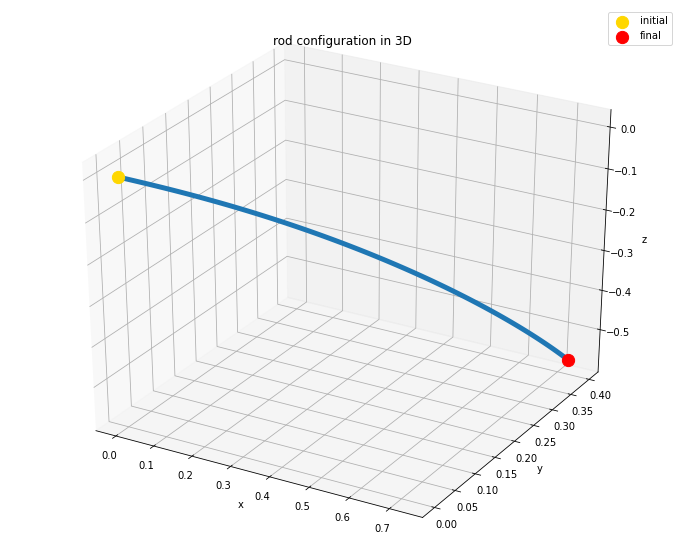

a = 0.54717061283504 0.30945082971696336 0.5005475444266967 0.6227295343068658 0.292941304434291 0.2651031706355488
b = 0.72819754377 0.39620752153 -0.56795647829


In [43]:
### Interpret final q's
x = [q14[i] for i in range(t_steps)]
y = [q24[i] for i in range(t_steps)]
z = [q34[i] for i in range(t_steps)]

# 3D plot
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x, y, z, linewidth=5)
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

# Print
print('a =', a[0], a[1], a[2], a[3], a[4], a[5])
print('b =', q14[-1], q24[-1], q34[-1])